# High Dimensional Data Analysis Day 1

In [1]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
cm.update(
    "rise",
    {
        "theme": "black",
        "transition": None,
        "start_slideshow_at": "selected",
        "enable_chalkboard": True,
        "chalkboard": {
            "color": ["rgb(225, 193, 7)", "rgb(30, 136, 229)"]
        },
     }
)

{'theme': 'black',
 'start_slideshow_at': 'selected',
 'enable_chalkboard': True,
 'chalkboard': {'color': ['rgb(225, 193, 7)', 'rgb(30, 136, 229)']}}

In [2]:
# limit # of obs.
# train = 350
# test = 350 
#kfold splits
n_splits = 3

# try onehot encoding nom vars (see Chris's helper function)
# comparison with less and more data.

Motivate this. Context for disucssion high dim analysis.

# Predict if house sales price will be high for market from house characteristics

## Ames housing dataset data


## load dataset

In [3]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name="house_prices", as_frame=True)

C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


## view data

In [4]:
df = housing.data
df = df.astype({'Id':int})  # set data type of Id to int
df = df.set_index('Id')  # set Id column to be the index of the DataFrame
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal


## all feature names

In [5]:
print(df.columns.tolist())

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC', 'Fen

# How do I find out what these features mean? Data Dictionary

In [6]:
from IPython.display import display, Pretty

# the housing object contains a Data Dictionary for the DataFrame
text = Pretty(housing.DESCR)
display(text)

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1

##EXERCISE_START:What does TotRmsAbvGrd refer to?
##EXERCISE_SOLUTION
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
##EXERCISE_END

##EXERCISE_START:How many variables are numeric?
##EXERCISE_SOLUTION
36 numeric (are these all continuous?)
43 text_based (are these all categorical?)
##EXERCISE_END

##EXERCISE_START:How many Nan entries are there per variable?
##EXERCISE_SOLUTION
# df.isna().sum()
##EXERCISE_END


##EXERCISE_START:Which of these variables would be the best predictor of house sale price? Why?
##EXERCISE_SOLUTION
Possible answers: SquareFt, OverallQual, YearBuilt
##EXERCISE_END


# Target Feature: SalePrice

In [7]:
# add target variable 'sales price' to data df from housing object
# initial stats - some take aways.
df[housing.target_names[0]] = housing.target.tolist()
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## what does SalePrice look like?

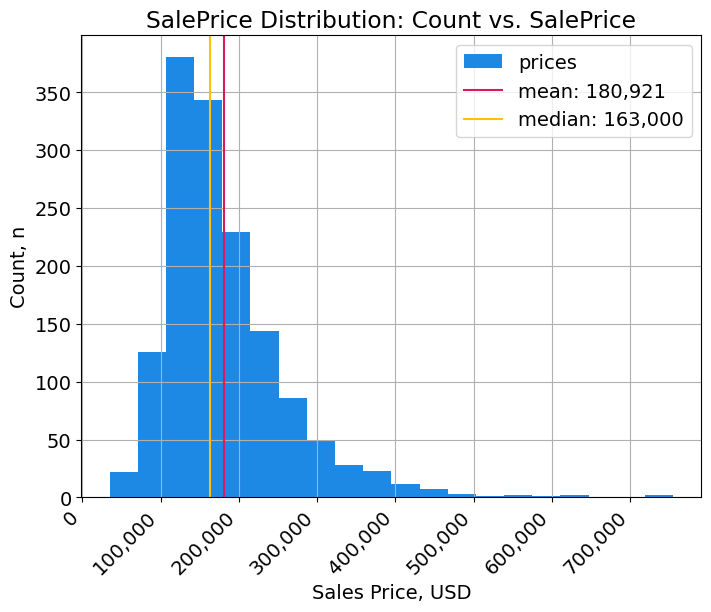

In [8]:
import helper_functions
helper_functions.plot_salesprice(
    df,
    #ylog=True
)

Is this a normal distribution? Will that distribution influcence modelling this value? How?

# Feature Selection

In [9]:
# Original DataFrame dimensions (+ SalesPrice)
print(f"{df.shape=}")

df.shape=(1460, 80)


In [10]:
# create dummy variables/ one hot encode dummy variables
import pandas as pd
numeric_variables = df.describe().columns.tolist()
nominative_variables = [x for x in df.columns.tolist() if x not in numeric_variables]

dummy_df = pd.get_dummies(df[nominative_variables])
print(dummy_df.shape)
dummy_df

(1460, 252)


,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [11]:
model_df = pd.concat([df[numeric_variables], dummy_df], axis=1) #.drop('SalePrice', axis=1)
print(model_df.shape)
model_df

(1460, 289)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,0,0,0,1,0,0,0,0,1,0
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
# for simplicity at this piont - let's only use numerical columns
# only numerical column descriptions
model_df.describe() 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EXERCISE_START: Modelling Dataset Description
1. how many observations are there in our dataset?
2. how many features are there in the whole dataset?
3. how many **numerical** features are there in the whole dataset?
# EXERCISE_SOLUTION
1. 1460 observations (len(df))
2. 79 features total (len(df.columns.tolist())) - 1 (can't use SalesPrice)
3. 36 numerical features (len(df[num_cols].columns.tolist()) - 1 (can't use SalesPrice)
# EXERCISE_END


# EXERCISE_START:Modelling Feature Selection
1. Can all of those features be used in a model?
2. Would you want to use all of those features?
# EXERCISE_SOLUTION
1. yes all the features could be used. With possible implications for the quality of the model.
3. features that are not (anti)correlated with the target variable may not add any useful information to the model
3. features that are correlated with other features may not add a lot more information and may produce a poorer quality model.

# EXERCISE_END

# EXERCISE_START:Model Feature Count
2. how many features should be used total?
# EXERCISE_SOLUTION
### A possible approach:
0. n = number of observations
1. uncorrelated features count = (n - 1)
2. as correlation increases, feature count proportional to sqrt(n)
    1. assuming some correlation: sqrt(1460) = 38.21
per: [Optimal number of features as a function of sample size for various classification rules](https://academic.oup.com/bioinformatics/article/21/8/1509/249540)

### Data analysis and modeling can be very emprical 
You need to try things out to see what works. If your features are indepent and identically distributed, or not, will impact how many observations are required

### Generally for a classifcation model
1. Distribution of features per target class matters a ton
2. More observations mean you can use more features
# EXERCISE_END


# EXERCISE_START:Overfitting
What is model overfitting? how does a model become overfit?

# EXERCISE_SOLUTION
your model is unabel to generalize - it has 'memorized' the data, rather than the patterns in it.

TODO: ADD IN HERE.

# EXERCISE_END


# EXERCISE_START:Model Feature Quality
4. which features should be used to predict the target variable? (which variables are good predictors?)
# EXERCISE_SOLUTION
Many possible answers here, some general ideas
1. those that are most correlated with the target variable
2. those that are not correlated with each other
# EXERCISE_END

# Build regression model to predict sales price

## Plot correlations and histograms of those columns

Reminder:
1. What features should go in a model to predict high house price?
2. What features are correlated with high house price?

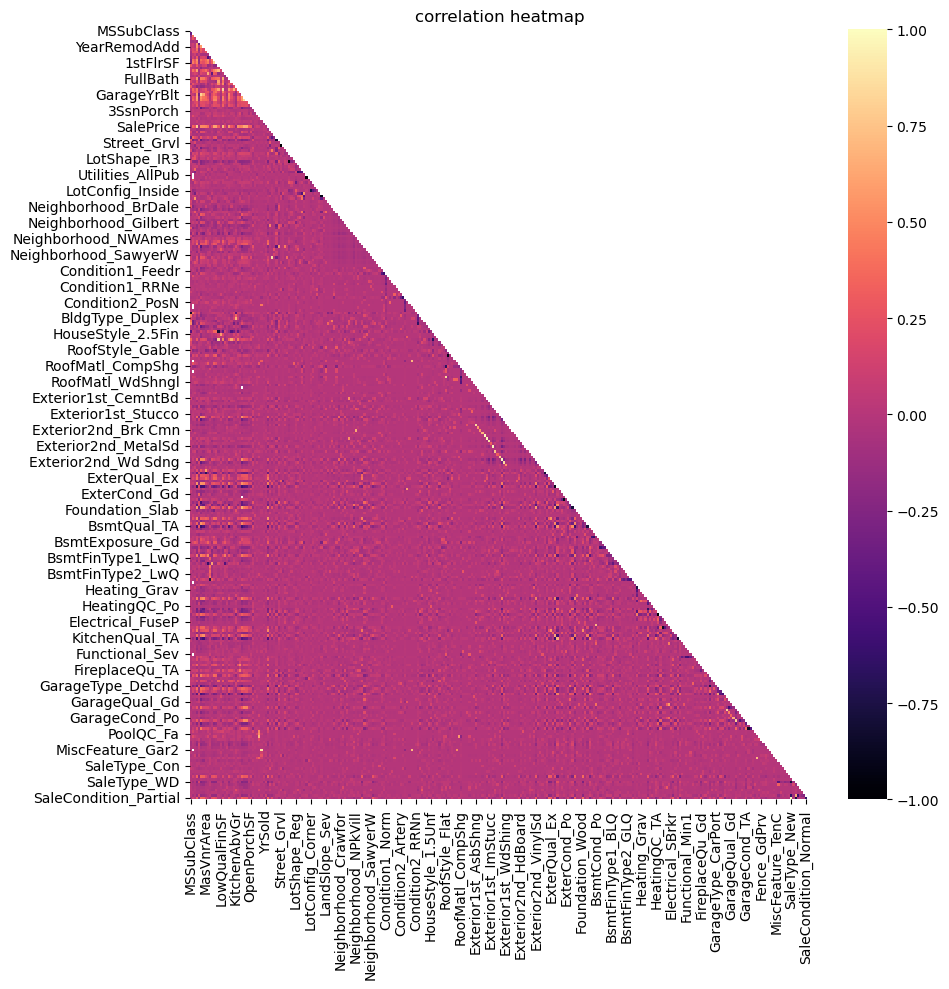

In [13]:
corr_mat=helper_functions.plot_regression_corr_matrix(model_df)


## check top 5 highest correlation values

In [14]:
corr_cols = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)
    .index
    .tolist()
)
corr_cols[1:6]


['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF']

# Create Pairplots of the top five most correlated values

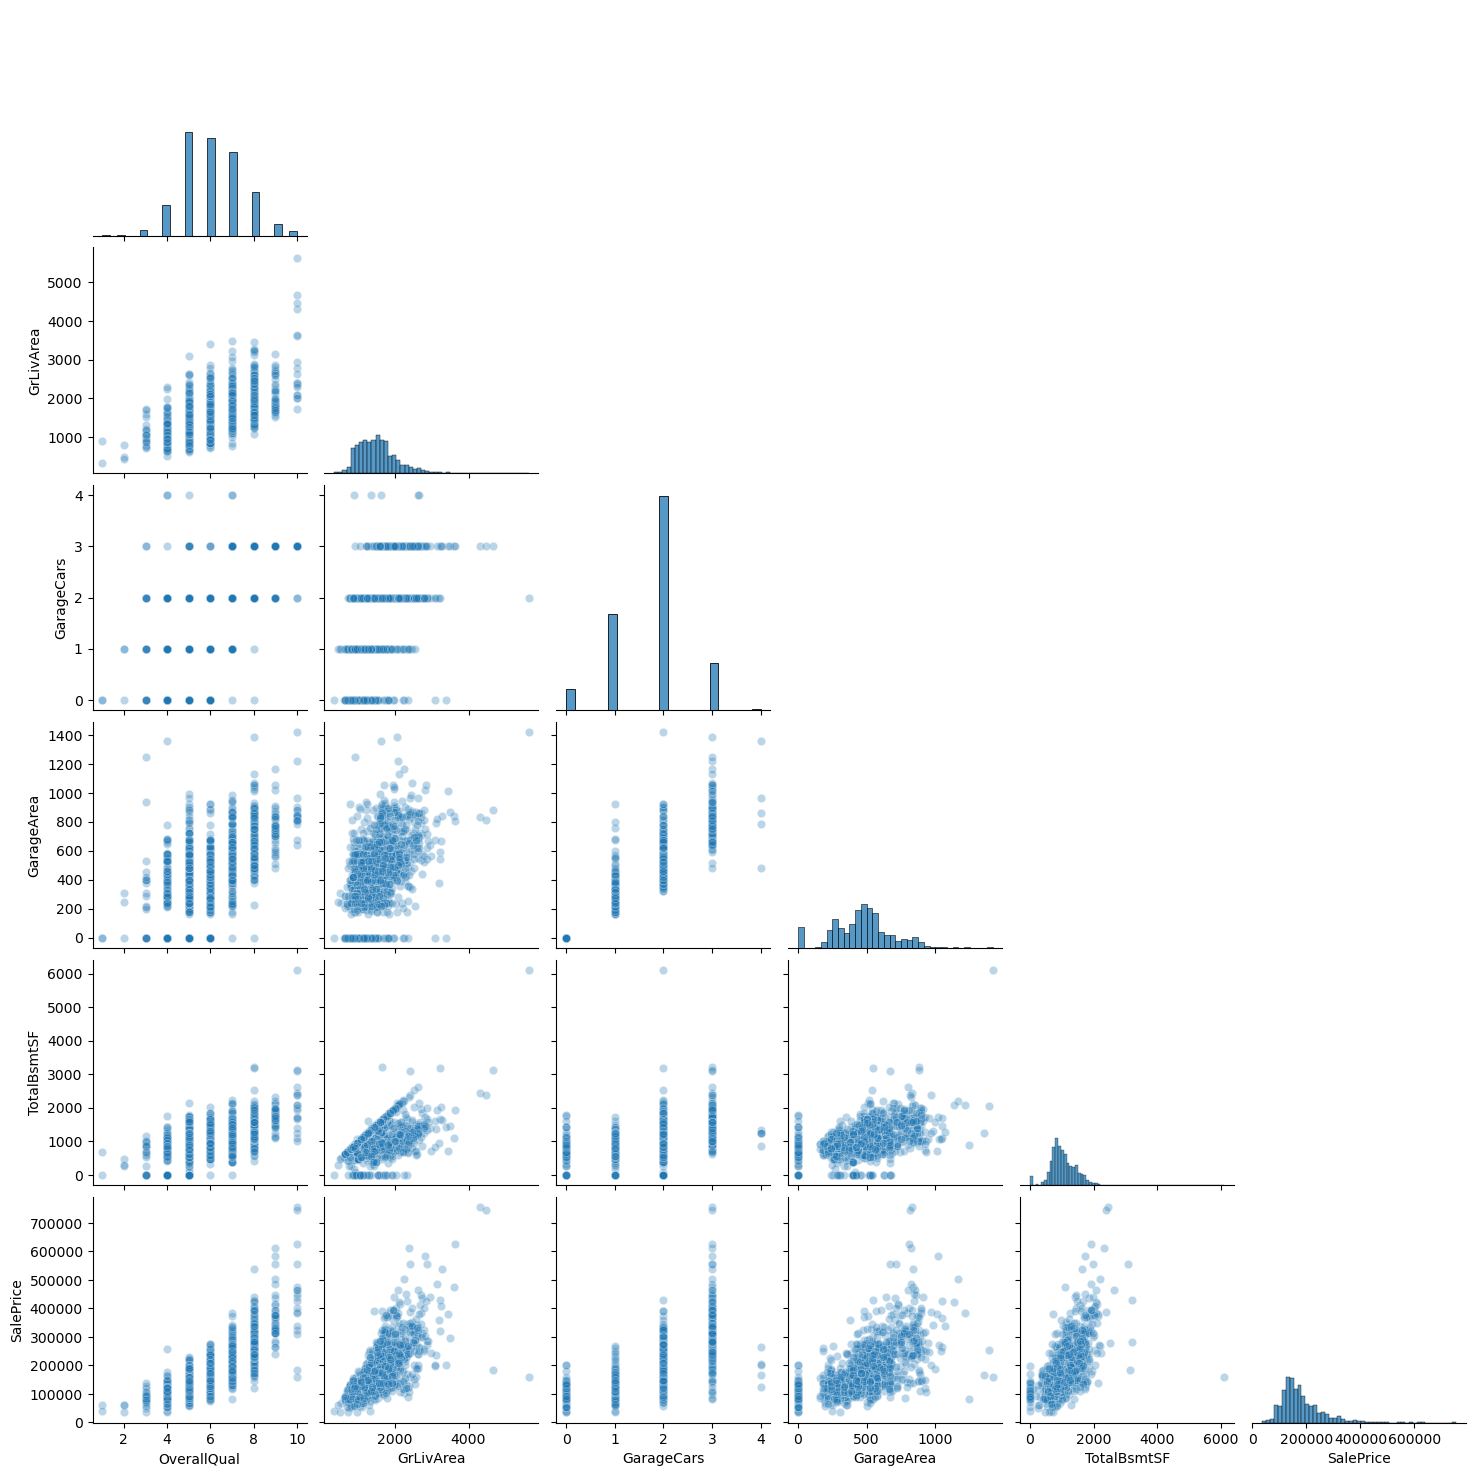

In [15]:
# Plot correlations and histograms of those columns, color with hue. This might take a while.
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(
    model_df[corr_cols[1:6] + ['SalePrice']],
    dropna=True,
    corner=True,
    plot_kws={'alpha': 0.3}
)

plt.show()

# Baseline - if always guess mean - RMSE?

In [16]:
from math import sqrt
mean_sale_price = model_df.SalePrice.mean()
diffs = model_df.SalePrice - mean_sale_price
rse = (diffs * diffs).apply(sqrt)
baseline_rmse = rse.mean()
print('baseline rmse: {:2f}'.format(baseline_rmse))

baseline rmse: 57434.770276


# Remove nulls from features

In [17]:
# which columns have the most nulls
model_df.isnull().sum().sort_values(ascending=False).head(20)

LotFrontage         259
GarageYrBlt          81
MasVnrArea            8
MSSubClass            0
BsmtExposure_Av       0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtCond_TA           0
BsmtFinType1_Rec      0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtFinType1_LwQ      0
dtype: int64

In [18]:
# assume null means none - replace all nulls with zeros for lotFrontage and MasVnrArea
no_null_model_df = model_df
no_null_model_df['LotFrontage'] = no_null_model_df['LotFrontage'].fillna(0)
no_null_model_df['MasVnrArea'] = no_null_model_df['MasVnrArea'].fillna(0)

# GarageYrBlt 0 makes no sense - replace with mean
no_null_model_df['GarageYrBlt'] = no_null_model_df['GarageYrBlt'].fillna(no_null_model_df['GarageYrBlt'].mean())
no_null_model_df.isnull().sum().sort_values(ascending=False).head(20)

MSSubClass             0
Exterior1st_VinylSd    0
BsmtFinType1_GLQ       0
BsmtFinType1_BLQ       0
BsmtFinType1_ALQ       0
BsmtExposure_No        0
BsmtExposure_Mn        0
BsmtExposure_Gd        0
BsmtExposure_Av        0
BsmtCond_TA            0
BsmtCond_Po            0
BsmtCond_Gd            0
BsmtCond_Fa            0
BsmtQual_TA            0
BsmtQual_Gd            0
BsmtQual_Fa            0
BsmtQual_Ex            0
BsmtFinType1_LwQ       0
BsmtFinType1_Rec       0
BsmtFinType1_Unf       0
dtype: int64

# separate features from target

In [19]:
features = no_null_model_df.drop('SalePrice', axis=1)
features
target = no_null_model_df['SalePrice']

In [20]:
# confirm features do not contain target
[x for x in features.columns if x == 'SalePrice']

[]

# Linear model:
## all non-null, numeric dimensions

In [34]:
from collections import defaultdict
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, StratifiedKFold
from typing import Tuple
from math import sqrt
import numpy as np


def run_linear_regression_with_kf(features: pd.DataFrame, labels: pd.Series, 
                                    n_splits=5, title='logistic regression model'
                                   ) -> Tuple[float,float,float,float]:
    """
    scale, split, and model data. Return model performance statistics, plot confusion matrix
    feature: dataframe of feature columns to model
    labels: series of labels to model against
    test_size: fraction of labels to use in test split
    title: title for chart
    return: recall mean, recall sd, precision mean, precision sd
    """
    # set up splits/folds and array for stats.
    kf = StratifiedKFold(n_splits=n_splits)
    r2s = np.zeros(n_splits)
    rmses = np.zeros(n_splits)
    
    # fit model for each split/fold
    for i, (train_idx, test_idx) in enumerate(kf.split(X=features, y=labels)):
        # split data
        try:
            X_train = features.iloc[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features.iloc[test_idx]
            y_test = labels.iloc[test_idx]
        
        except AttributeError:  # ndarray doesn't have .iloc
            X_train = features[train_idx]
            y_train = labels.iloc[train_idx]
            X_test = features[test_idx]
            y_test = labels.iloc[test_idx]
            
        
        # scale all features to training features
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        # fit model, evaluate
        regr = LinearRegression().fit(X_train, y_train)
        y_pred = regr.predict(X_test)
        r2s[i] = r2_score(y_test, y_pred)
        rmses[i] = sqrt(mean_squared_error(y_test, y_pred))
    
    r2_mean = r2s.mean()
    r2_sd = r2s.std()
    rmse_mean = rmses.mean()
    rmse_sd = rmses.std()
    

    # plot mean confusion matrix
    fig, ax = plt.subplots(1, 1, figsize=(8, 6))
    ax.scatter(y_test, y_pred, alpha=0.3)
    ax.set_title(f'{title}\n' \
                 'mean r2: {:.2f},\n'\
                 'mean rmse {:.2f}'
                 .format(r2_mean, rmse_mean)
    )
    ax.set_xlabel('True Value')
    ax.set_ylabel('Predicted Value')
    plt.show()
    return r2_mean, rmse_mean, r2_sd, rmse_sd




C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


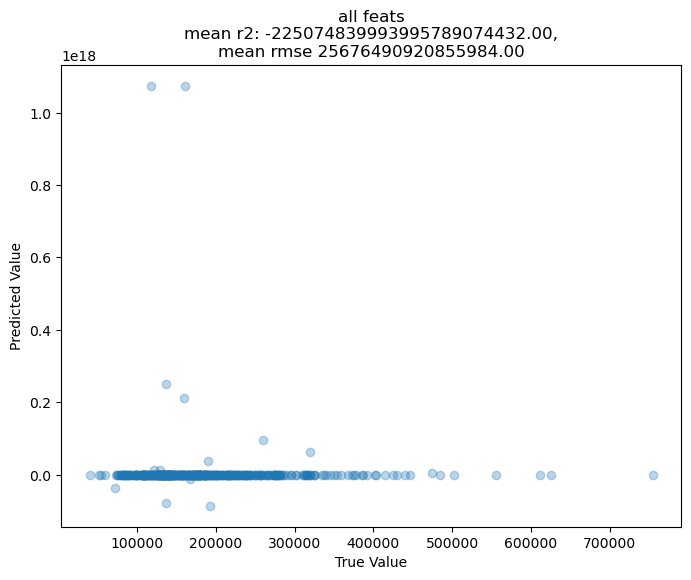

In [35]:
all_stats = {}
all_stats['all'] = run_linear_regression_with_kf(features=features, labels=target, n_splits=n_splits, title='all feats')

(1460, 12)


C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


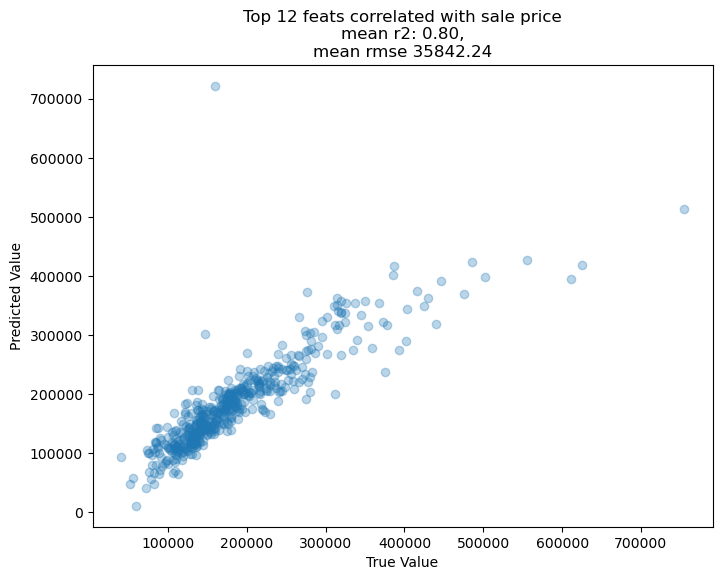

In [46]:
corr_12 = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)[1:13]
    .index
    .tolist()
)
print(features[corr_12].shape)
all_stats['top12'] = run_linear_regression_with_kf(features=features[corr_12], labels=target, n_splits=n_splits, title='Top 12 feats correlated with sale price')



# Linear model:
## top 5 most correlated dimensions only

(1460, 5)


C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


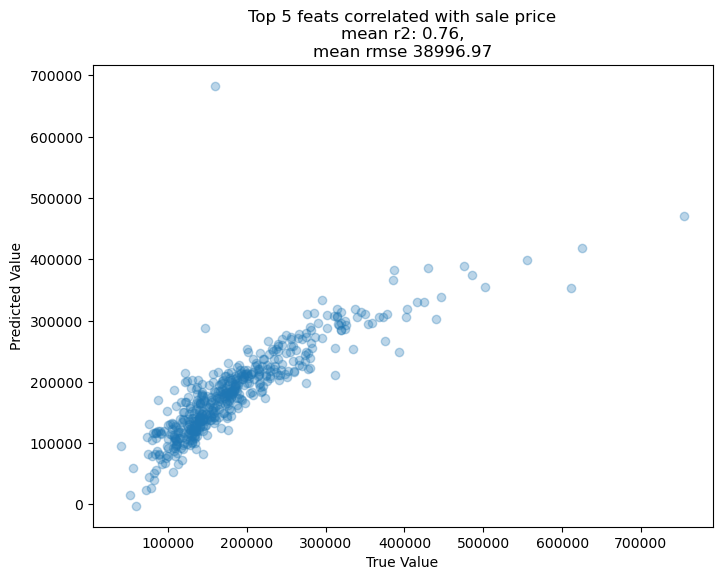

In [47]:
corr_5 = (
    corr_mat['SalePrice']
    .sort_values(ascending=False)[1:6]
    .index
    .tolist()
)
print(features[corr_5].shape)
all_stats['top6'] = run_linear_regression_with_kf(features=features[corr_5], labels=target, n_splits=n_splits, title='Top 5 feats correlated with sale price')



In [38]:
# Linear model:
## top 12 most correlated dimensions only

# Linear Model:
## 2D PCA of all columns

In [55]:
features.shape

(1460, 288)

C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


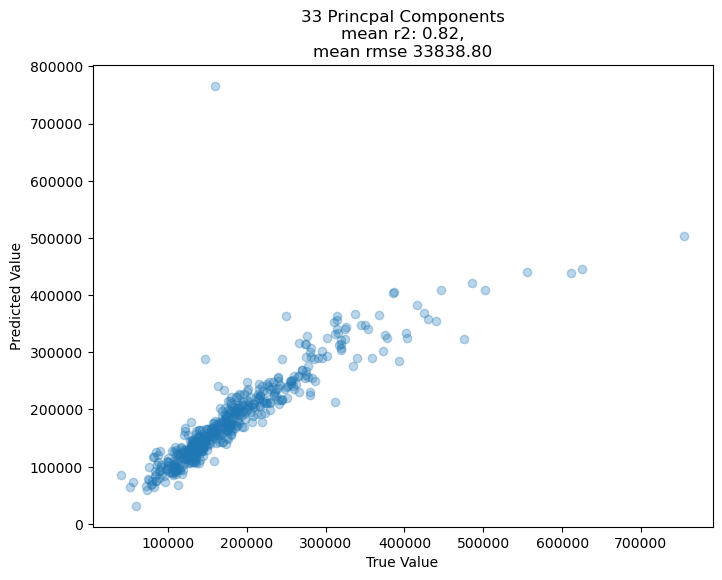

In [57]:
from sklearn.decomposition import PCA
p = PCA(n_components=100)
features_pca = p.fit_transform(features)
all_stats['all_pca'] = run_linear_regression_with_kf(features=features_pca, labels=target, 
                                                title='33 Princpal Components', n_splits=n_splits)


C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


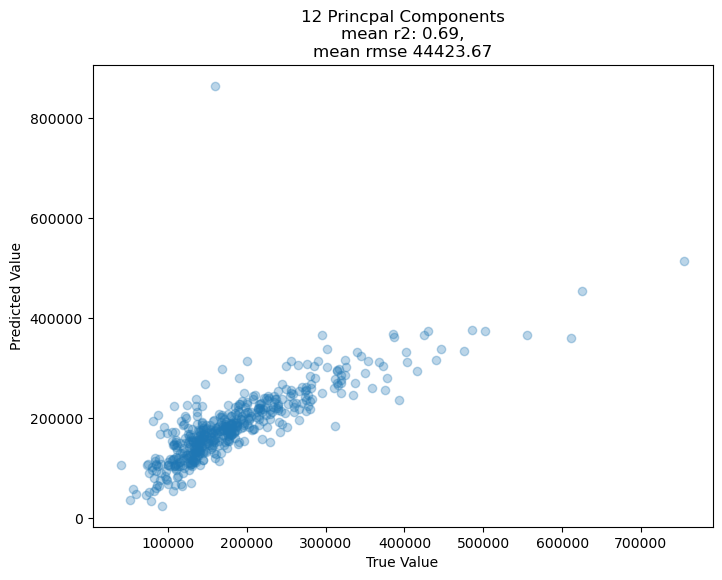

In [52]:
from sklearn.decomposition import PCA
p = PCA(n_components=12)
features_pca_12 = p.fit_transform(features)

all_stats['12d_pca'] = run_linear_regression_with_kf(features=features_pca_12, labels=target, 
                                                title='12 Princpal Components', n_splits=n_splits)


C:\Users\Endemann\anaconda3\envs\highdim_workshop\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


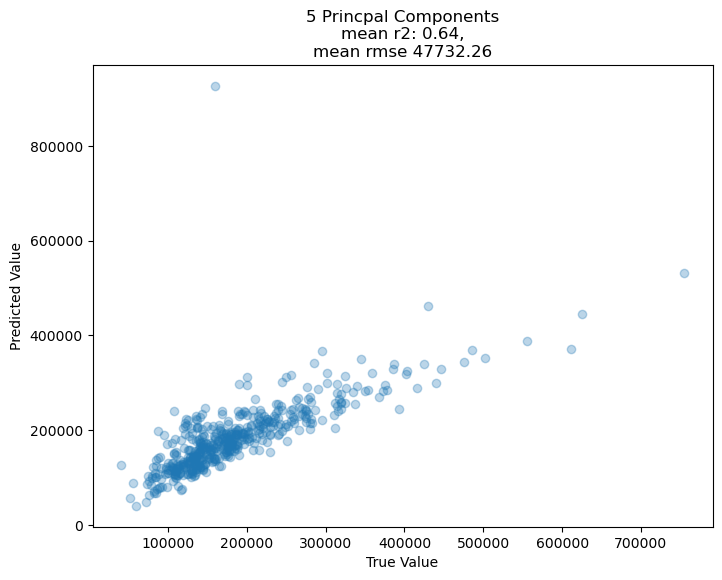

In [53]:
from sklearn.decomposition import PCA
p = PCA(n_components=5)
features_pca_5 = p.fit_transform(features)

all_stats['5d_pca'] = run_linear_regression_with_kf(features=features_pca_5, labels=target, 
                                                title='5 Princpal Components', n_splits=n_splits)


# Model Comparison

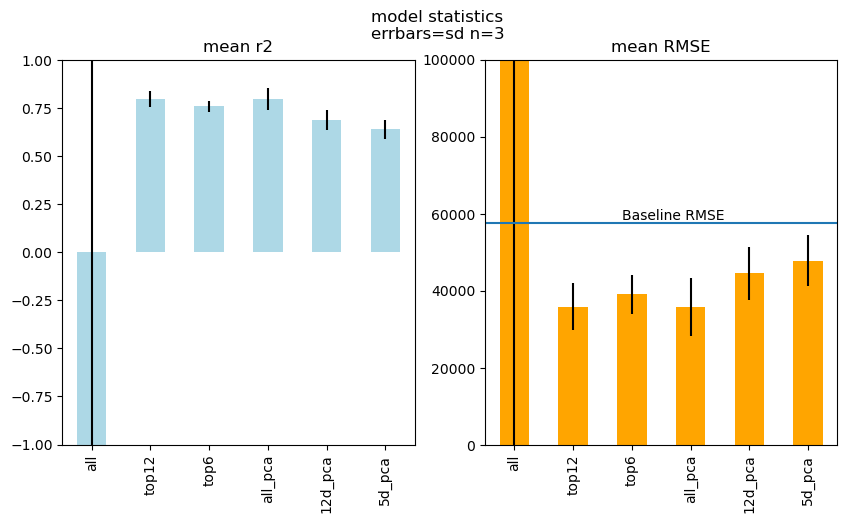

In [54]:
# create combined stats df
stats_df = pd.DataFrame.from_dict(all_stats).set_index(
    pd.Index(['r2_mean', 'rmse_mean', 'r2_sd', 'rmse_sd'], name='statistics')
)

# plot figures
fig, axs = plt.subplots(1,2, figsize=(10, 5))
stats_df.loc['r2_mean'].plot(ax=axs[0], kind='bar', yerr=stats_df.loc['r2_sd'], title='mean r2',  color='lightblue', ylim=(-1,1))
stats_df.loc['rmse_mean'].plot(ax=axs[1], kind='bar', yerr=stats_df.loc['rmse_sd'], title=f'mean RMSE',  color='orange', ylim=(0, 100_000)) 
# plot baseline - guess mean every time RMSE
xmin, xmax = plt.xlim()
axs[1].hlines(baseline_rmse, xmin=xmin, xmax=xmax)
axs[1].text(xmax/3, baseline_rmse + 1000, 'Baseline RMSE')
plt.suptitle(f'model statistics\nerrbars=sd n={n_splits}')
plt.show()


##EXERCISE_START: Why Didn't The model based on PCA do better?
PCA based model accuracy generally lower than all variables or top 5 variables. Why?
##EXERCISE_SOLUTION:
reducing variables in classifier, introduce bias error.
##EXERCISE_END

##EXERCISE_START: Fit a PCA model with 5 PCs.
What do you think the out come will be?
##EXERCISE_SOLUTION:
upping variables in classifier, reduce bias error.
tail ends of distributions can have high predictive power - a small amount of variance can be impactful
##EXERCISE_END

# What Is Going On?

## Intuition: 

#### PCA is a way to rotate the *axes* of your dataset around the *data* so that the axes line up with the *directions of the greatest variation* through the data.






# reviewed

1. exlpored Ames housing dataset
2. looked for variables that would correlate with/be good predictors for housing prices
3. indicated that PCA might be a way to approach this problem


We'll go into more detail on PCA in the next episode